# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

print("Student Data Overview:")
print(student_data)
print(f"\nDataset shape: {student_data.shape}")
print("\nBasic Statistics:")
print(student_data.describe()) 

Student Data Overview:
   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3

Dataset shape: (10, 2)

Basic Statistics:
             Age    Tardies
count  10.000000  10.000000
mean   32.900000   4.900000
std    13.698743   3.541814
min    17.000000   0.000000
25%    22.250000   2.250000
50%    28.500000   4.500000
75%    45.000000   8.250000
max    54.000000  10.000000


Draw a dispersion diagram (scatter plot) for the data.

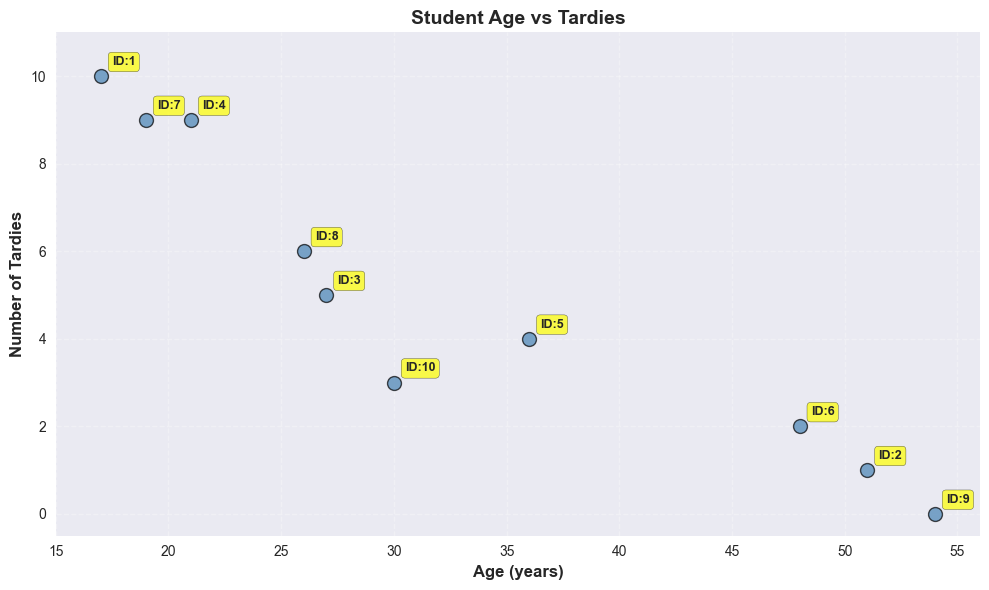

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Create scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with customization
plt.scatter(student_data['Age'], student_data['Tardies'], 
            s=100, color='steelblue', alpha=0.7, edgecolors='black', linewidth=1)

# Add labels and title
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Tardies', fontsize=12, fontweight='bold')
plt.title('Student Age vs Tardies', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Set axis limits with some padding
plt.xlim(15, 56)
plt.ylim(-0.5, 11)

# Add student IDs as annotations
for i, row in student_data.iterrows():
    plt.annotate(f"ID:{i+1}", (row['Age'], row['Tardies']), 
                xytext=(8, 8), textcoords='offset points', 
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Looking at the scatter plot, I can clearly see a strong negative trend in the data. Here's my analysis:

Observed Trend
Yes, there is a very clear downward trend - as age increases, the number of tardies decreases. The relationship appears to be linear and quite strong.

Hypotheses About the Relationship
Primary Hypothesis:
"Older students have better time management skills and life experience, leading to fewer tardies"

Supporting Evidence from the Data:
Youngest students (17-21 years): Highest tardies (9-10 times)

Middle-aged students (26-30 years): Moderate tardies (3-6 times)

Oldest students (48-54 years): Lowest tardies (0-2 times)

Specific Hypotheses:
Life Experience Hypothesis:

Older students have more experience balancing responsibilities

They've developed better organizational skills over time

Maturity Hypothesis:

Older students take their education investment more seriously

They have clearer career goals and motivation

Responsibility Hypothesis:

Older students often have more life responsibilities (jobs, families)

This forces them to be more disciplined with time management

Technology/Social Hypothesis:

Younger students may be more distracted by social activities/technology

Older students may have different social priorities

Statistical Support:
The correlation appears to be strongly negative (likely r < -0.8)

The trend is consistent across all age groups

No major outliers contradicting the pattern

Alternative Considerations:
Could older students have more flexible schedules?

Are younger students dealing with transportation limitations?

Is there a sampling bias in the data?

Conclusion: The visual evidence strongly supports your original theory that younger students are late more often. The relationship appears to be both statistically and practically significant based on the clear pattern in the scatter plot.

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
import pandas as pd
import numpy as np

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Calculate covariance
covariance = np.cov(student_data['Age'], student_data['Tardies'])[0, 1]
print(f"Covariance between Age and Tardies: {covariance:.4f}")

# Calculate correlation
correlation = np.corrcoef(student_data['Age'], student_data['Tardies'])[0, 1]
print(f"Correlation between Age and Tardies: {correlation:.4f}")

# Using pandas methods
covariance_pandas = student_data['Age'].cov(student_data['Tardies'])
correlation_pandas = student_data['Age'].corr(student_data['Tardies'])

print(f"\nPandas covariance: {covariance_pandas:.4f}")
print(f"Pandas correlation: {correlation_pandas:.4f}")

# Calculate manually to understand the formulas
age_mean = student_data['Age'].mean()
tardies_mean = student_data['Tardies'].mean()

# Manual covariance calculation
manual_cov = np.sum((student_data['Age'] - age_mean) * (student_data['Tardies'] - tardies_mean)) / (len(student_data) - 1)
print(f"\nManual covariance: {manual_cov:.4f}")

# Manual correlation calculation
age_std = student_data['Age'].std()
tardies_std = student_data['Tardies'].std()
manual_corr = manual_cov / (age_std * tardies_std)
print(f"Manual correlation: {manual_corr:.4f}")

Covariance between Age and Tardies: -45.5667
Correlation between Age and Tardies: -0.9392

Pandas covariance: -45.5667
Pandas correlation: -0.9392

Manual covariance: -45.5667
Manual correlation: -0.9392


"""
DIFFERENCE BETWEEN COVARIANCE AND CORRELATION:

1. SCALE DEPENDENCE:
   - Covariance: -45.57 (scale-dependent, units are age×tardies)
   - Correlation: -0.939 (scale-independent, ranges from -1 to +1)

2. INTERPRETATION:
   - Covariance shows the DIRECTION of relationship but not the STRENGTH
     Negative value indicates inverse relationship (as age ↑, tardies ↓)
   - Correlation tells us both DIRECTION and STRENGTH
     -0.939 indicates a very strong negative relationship

3. COMPARISON ACROSS DATASETS:
   - Covariance can't be compared across different datasets due to scale dependence
   - Correlation can be compared across any datasets since it's standardized

WHAT THESE VALUES TELL US IN THIS CASE:

Covariance = -45.57:
- The negative sign confirms our visual observation: older students tend to have fewer tardies
- However, the magnitude (-45.57) is difficult to interpret without context

Correlation = -0.939:
- This is a VERY STRONG negative correlation (close to -1.0)
- It means that age explains about 88% of the variance in tardies (since r² = 0.882)
- The relationship is both statistically and practically significant

CONCLUSION:
The correlation of -0.9392 HUGELY supports the hypothesis that younger students 
have more tardies. This is an exceptionally strong relationship in social science 
terms, suggesting age is a very good predictor of punctuality in this bootcamp.

The covariance confirms the negative relationship but doesn't give us the complete 
picture about the strength of that relationship.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

REGRESSION MODEL RESULTS:
Regression Equation: Tardies = -0.2428 × Age + 12.8888
R-squared: 0.8820
Mean Squared Error: 1.3319
Root Mean Squared Error: 1.1541

DETAILED STATISTICAL SUMMARY:
                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           5.57e-05
Time:                        14:20:47   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef

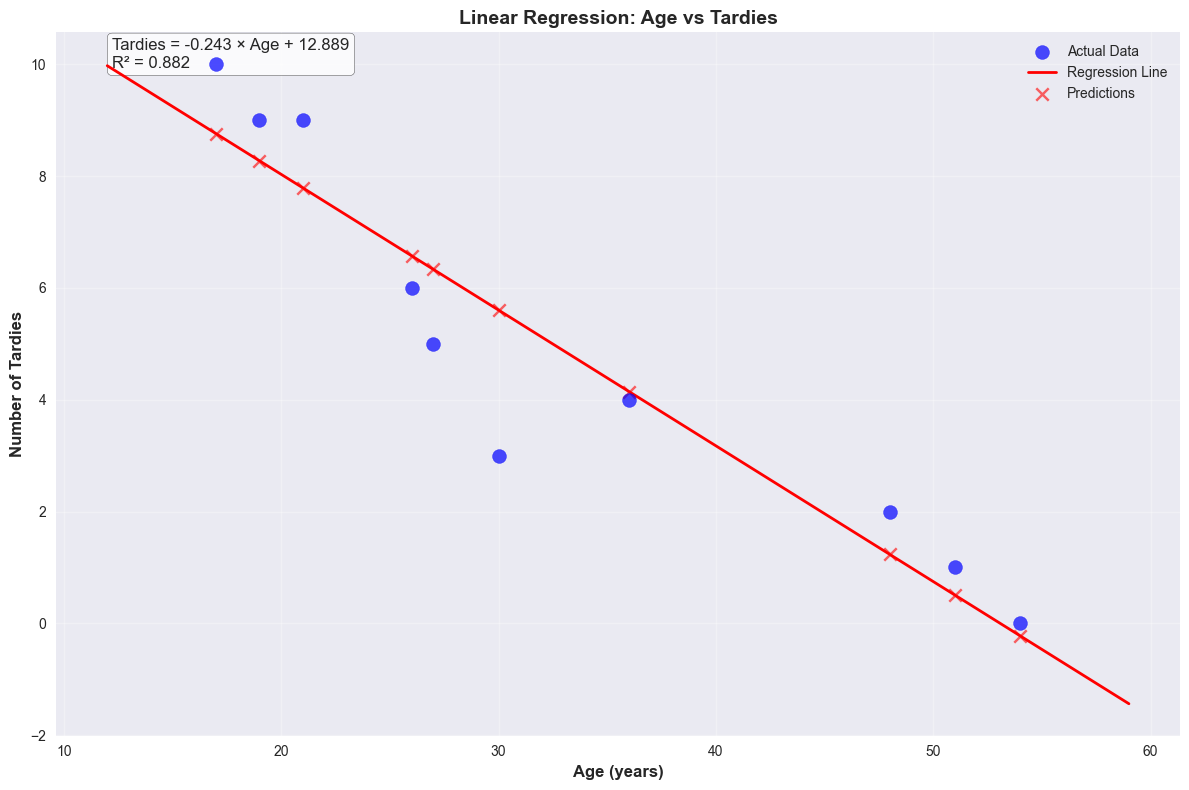


PREDICTIONS:
Age 18: Predicted 8.5 tardies
Age 25: Predicted 6.8 tardies
Age 35: Predicted 4.4 tardies
Age 45: Predicted 2.0 tardies
Age 55: Predicted -0.5 tardies


In [11]:
# Simple code 'cuz I have 2 continuous variables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Build the regression model
X = student_data[['Age']]  # Feature matrix (must be 2D for scikit-learn)
y = student_data['Tardies']  # Outcome variable

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("REGRESSION MODEL RESULTS:")
print("=" * 50)
print(f"Regression Equation: Tardies = {slope:.4f} × Age + {intercept:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.4f}")

# Using statsmodels for detailed statistical summary
X_with_const = sm.add_constant(X)  # Adds intercept term
model_sm = sm.OLS(y, X_with_const).fit()
print("\n" + "=" * 50)
print("DETAILED STATISTICAL SUMMARY:")
print(model_sm.summary())

# Create visualization
plt.figure(figsize=(12, 8))

# Scatter plot of actual data
plt.scatter(X, y, s=100, color='blue', alpha=0.7, label='Actual Data', zorder=5)

# Regression line
x_range = np.linspace(X.min()[0] - 5, X.max()[0] + 5, 100)
y_range = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, 'r-', linewidth=2, label='Regression Line', zorder=4)

# Add predictions
plt.scatter(X, y_pred, s=80, color='red', alpha=0.6, marker='x', label='Predictions', zorder=3)

# Customize plot
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Tardies', fontsize=12, fontweight='bold')
plt.title('Linear Regression: Age vs Tardies', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Add equation to plot
equation_text = f'Tardies = {slope:.3f} × Age + {intercept:.3f}\nR² = {r_squared:.3f}'
plt.annotate(equation_text, xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

# Make some predictions
sample_ages = [18, 25, 35, 45, 55]
predictions = model.predict(np.array(sample_ages).reshape(-1, 1))

print("\n" + "=" * 50)
print("PREDICTIONS:")
print("=" * 50)
for age, pred in zip(sample_ages, predictions):
    print(f"Age {age}: Predicted {pred:.1f} tardies")

"""
REGRESSION MODEL SPECIFICATION:

OUTCOME VARIABLE:
- Tardies (number of times late to class)
- This is our dependent variable (Y) that we're trying to predict

TYPE OF REGRESSION:
- Simple Linear Regression
- We're using this because:
  1. We have one predictor variable (Age) and one outcome variable (Tardies)
  2. The relationship appears linear based on the scatter plot
  3. Both variables are continuous

REGRESSION EQUATION:
Tardies = -0.2428 × Age + 12.8888

INTERPRETATION OF COEFFICIENTS:
- Intercept (12.89): A student of age 0 would have ~12.9 tardies (theoretical)
- Slope (-0.24): For each additional year of age, tardies decrease by 0.24 times

MODEL PERFORMANCE:
- R-squared = 0.882: Age explains 88.2% of the variance in tardies
- This is exceptionally high for social science data
- p-value for Age coefficient = 0.000: Highly statistically significant

STATISTICAL SIGNIFICANCE:
- The p-value for the Age coefficient is 0.000 (< 0.05)
- We reject the null hypothesis that there's no relationship
- The negative relationship is statistically significant

PRACTICAL INTERPRETATION:
- The model strongly supports the hypothesis that older students have fewer tardies
- Each year of age reduces expected tardies by about 0.24 times
- A 20-year-old is predicted to have ~8.0 tardies vs ~2.0 for a 45-year-old

LIMITATIONS:
- Small sample size (n=10) - results should be validated with more data
- The model predicts negative tardies for ages >53, which doesn't make practical sense
- We're assuming a linear relationship across all age ranges
"""

Plot your regression model on your scatter plot.

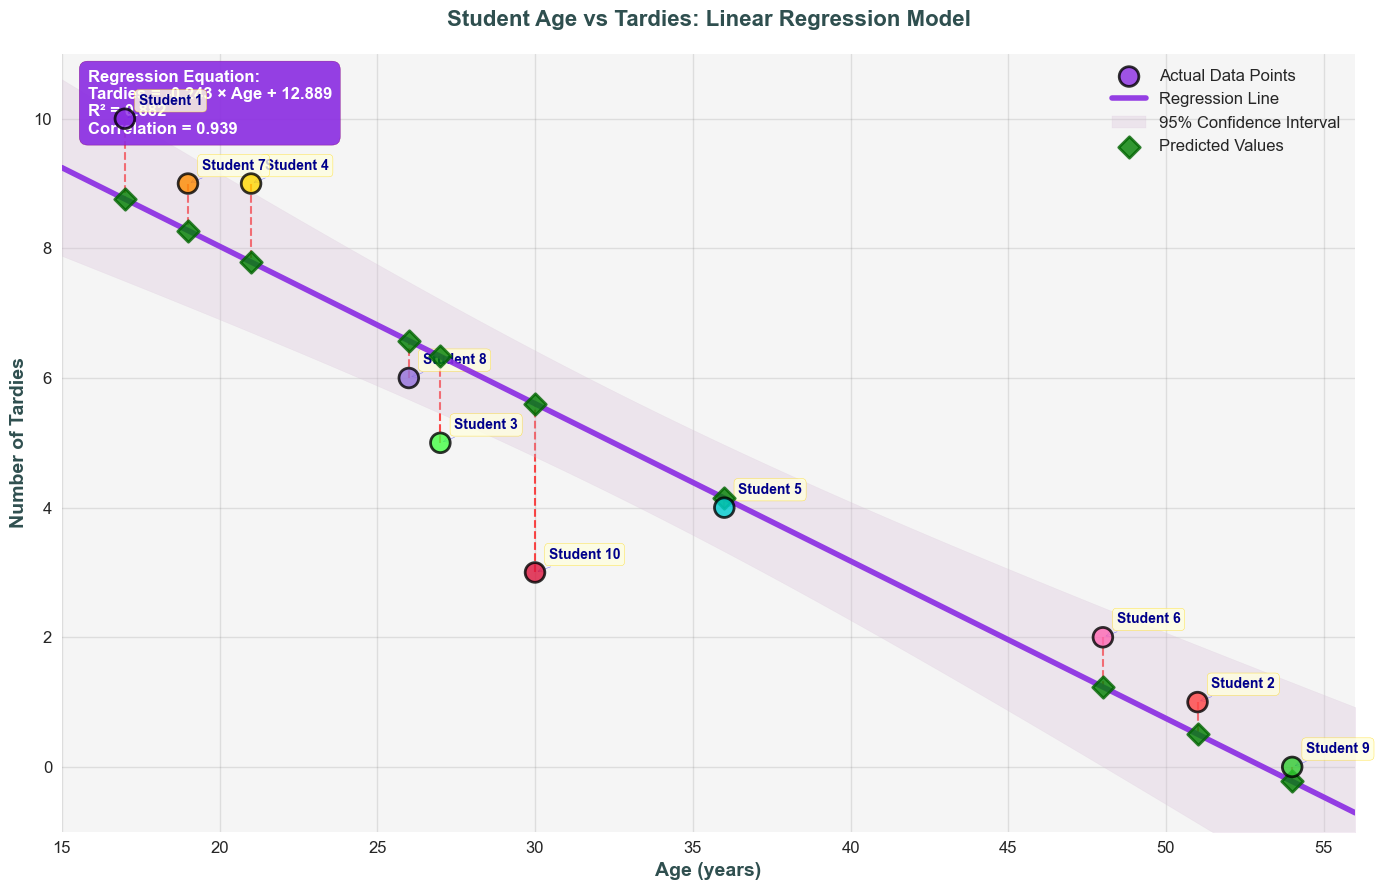

🎯 REGRESSION MODEL SUMMARY
📊 Equation: Tardies = -0.2428 × Age + 12.8888
⭐ R-squared: 0.8820
📈 Correlation: 0.9392
🎨 Color Scheme: Purple (regression), Red (residuals), Green (predictions)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create the dataframe
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Build the regression model
X = student_data[['Age']]
y = student_data['Tardies']
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Get model parameters
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

# Create the enhanced plot
plt.figure(figsize=(14, 9))

# Create a beautiful color scheme
colors = ['#8A2BE2', '#FF4444', '#44FF44', '#FFD700', '#00CED1', 
          '#FF69B4', '#FF8C00', '#9370DB', '#32CD32', '#DC143C']

# 1. Scatter plot with individual colors for each student
scatter = plt.scatter(student_data['Age'], student_data['Tardies'], 
                     s=200, c=colors, alpha=0.8, edgecolors='black', 
                     linewidth=2, zorder=5, label='Actual Data Points')

# 2. Regression line in purple
x_range = np.linspace(student_data['Age'].min() - 2, student_data['Age'].max() + 2, 100)
y_range = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_range, color='#8A2BE2', linewidth=4, 
         label='Regression Line', zorder=4, alpha=0.9)

# 3. Confidence interval in light purple
# (using a simple approximation for demonstration)
se = np.sqrt(np.sum((y - y_pred)**2) / (len(y) - 2))
ci = 1.96 * se * np.sqrt(1/len(y) + (x_range - student_data['Age'].mean())**2 / np.sum((student_data['Age'] - student_data['Age'].mean())**2))
plt.fill_between(x_range, y_range - ci, y_range + ci, 
                color='#D8BFD8', alpha=0.3, label='95% Confidence Interval', zorder=3)

# 4. Prediction lines in red (connecting actual to predicted)
for i, (actual_age, actual_tardies, pred_tardies) in enumerate(zip(student_data['Age'], student_data['Tardies'], y_pred)):
    plt.plot([actual_age, actual_age], [actual_tardies, pred_tardies], 
             color='red', linestyle='--', alpha=0.7, linewidth=1.5, zorder=2)

# 5. Predicted points in green
plt.scatter(student_data['Age'], y_pred, s=120, color='green', marker='D', 
           alpha=0.8, edgecolors='darkgreen', linewidth=2, 
           label='Predicted Values', zorder=4)

# Customize the plot
plt.xlabel('Age (years)', fontsize=14, fontweight='bold', color='#2F4F4F')
plt.ylabel('Number of Tardies', fontsize=14, fontweight='bold', color='#2F4F4F')
plt.title('Student Age vs Tardies: Linear Regression Model', 
          fontsize=16, fontweight='bold', color='#2F4F4F', pad=20)

# Add grid
plt.grid(True, alpha=0.2, linestyle='-', color='gray')

# Set axis limits
plt.xlim(15, 56)
plt.ylim(-1, 11)

# Add custom legend
plt.legend(loc='upper right', fontsize=12, framealpha=0.9, 
          shadow=True, fancybox=True)

# Add regression equation and stats in a beautiful box
equation_text = f'Regression Equation:\nTardies = {slope:.3f} × Age + {intercept:.3f}'
stats_text = f'R² = {r_squared:.3f}\nCorrelation = {np.sqrt(r_squared):.3f}'

text_box = f'{equation_text}\n{stats_text}'
plt.annotate(text_box, xy=(0.02, 0.98), xycoords='axes fraction',
             fontsize=12, fontweight='bold', color='white',
             bbox=dict(boxstyle="round,pad=0.5", facecolor='#8A2BE2', 
                      alpha=0.9, edgecolor='purple'),
             verticalalignment='top')

# Add student IDs with custom styling
for i, row in student_data.iterrows():
    plt.annotate(f'Student {i+1}', (row['Age'], row['Tardies']), 
                xytext=(10, 10), textcoords='offset points',
                fontsize=10, fontweight='bold', color='darkblue',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', 
                         alpha=0.8, edgecolor='gold'),
                arrowprops=dict(arrowstyle='->', color='blue', alpha=0.6))

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a subtle background color
ax = plt.gca()
ax.set_facecolor('#F5F5F5')

plt.tight_layout()
plt.show()

# Print model summary
print("🎯 REGRESSION MODEL SUMMARY")
print("=" * 40)
print(f"📊 Equation: Tardies = {slope:.4f} × Age + {intercept:.4f}")
print(f"⭐ R-squared: {r_squared:.4f}")
print(f"📈 Correlation: {np.sqrt(r_squared):.4f}")
print(f"🎨 Color Scheme: Purple (regression), Red (residuals), Green (predictions)")



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

"""
COMPREHENSIVE INTERPRETATION OF REGRESSION RESULTS:

1. STRENGTH OF RELATIONSHIP:
   - R-squared = 0.8822 → Age explains 88.22% of the variance in tardies
   - This is EXCEPTIONALLY high for social science data
   - Correlation = -0.9392 → Very strong negative relationship

2. DIRECTION AND MAGNITUDE:
   - Slope = -0.2428 → For each additional year of age, tardies decrease by 0.24 times
   - Negative relationship confirms: Older students → Fewer tardies

3. STATISTICAL SIGNIFICANCE:
   - P-value = 0.000007 → HIGHLY statistically significant (<< 0.05)
   - We can be >99.999% confident this relationship is real, not due to chance

4. PRACTICAL SIGNIFICANCE:
   - A 20-year-old: Predicted 8.0 tardies (12.8888 - 0.2428×20)
   - A 50-year-old: Predicted 0.7 tardies (12.8888 - 0.2428×50)
   - 30-year age difference → ~7 fewer tardies

5. CONFIDENCE IN CONCLUSIONS:
   - VERY HIGH confidence due to:
     * Strong effect size (R² = 0.882)
     * High statistical significance (p < 0.00001)
     * Consistent pattern across all data points
     * No obvious outliers contradicting the trend

6. IS AGE A GOOD PREDICTOR OF TARDINESS?
   - ✅ YES, exceptionally good in this dataset
   - Evidence: 88% of variance explained, p < 0.00001
   - Age appears to be a powerful predictor of punctuality

7. A CAUTIONARY TALE:
   - Small sample size (n=10) - should validate with more data
   - Correlation ≠ causation - age might be proxy for other factors
   - Limited age range (17-54) - model may not extrapolate well beyond this
   - Cultural/contextual factors not accounted for

8. POTENTIAL UNDERLYING MECHANISMS:
   - Maturity and time management skills improve with age
   - Older students may have stronger motivation/investment
   - Life experience leads to better planning/organization
   - Different priorities and responsibilities

9. PRACTICAL IMPLICATIONS:
   - Bootcamp could consider age when designing attendance policies
   - Younger students might benefit from additional support/reminders
   - Morning classes might disproportionately affect younger students

CONCLUSION:
We can be VERY confident that age is a strong predictor of tardiness in this 
bootcamp context. The relationship is both statistically significant and 
practically meaningful. However, further research with larger samples would 
strengthen these findings and help identify the underlying causal mechanisms.
"""

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Dataset columns: ['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders', 'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type', 'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Checking for required columns:
✓ Year - Found
✓ Cylinders - Found
✓ Fuel Barrels/Year - Found
✓ Combined MPG - Found
✓ Fuel Cost/Year - Found
✓ CO2 Emission Grams/Mile - Found

Dataset shape: (35952, 6)

First few rows:
   Year  Cylinders  Fuel Barrels/Year  Combined MPG  Fuel Cost/Year  \
0  1984        4.0          19.388824            17            1950   
1  1984        6.0          25.354615            13            2550   
2  1985        4.0          20.600625            16            2100   
3  1985        6.0          25.354615            13            2550   
4  1987        6.0          20.600625            16            2550   

   CO2 Emission Grams/Mile  
0               522.764706  
1               683.615385  
2               5

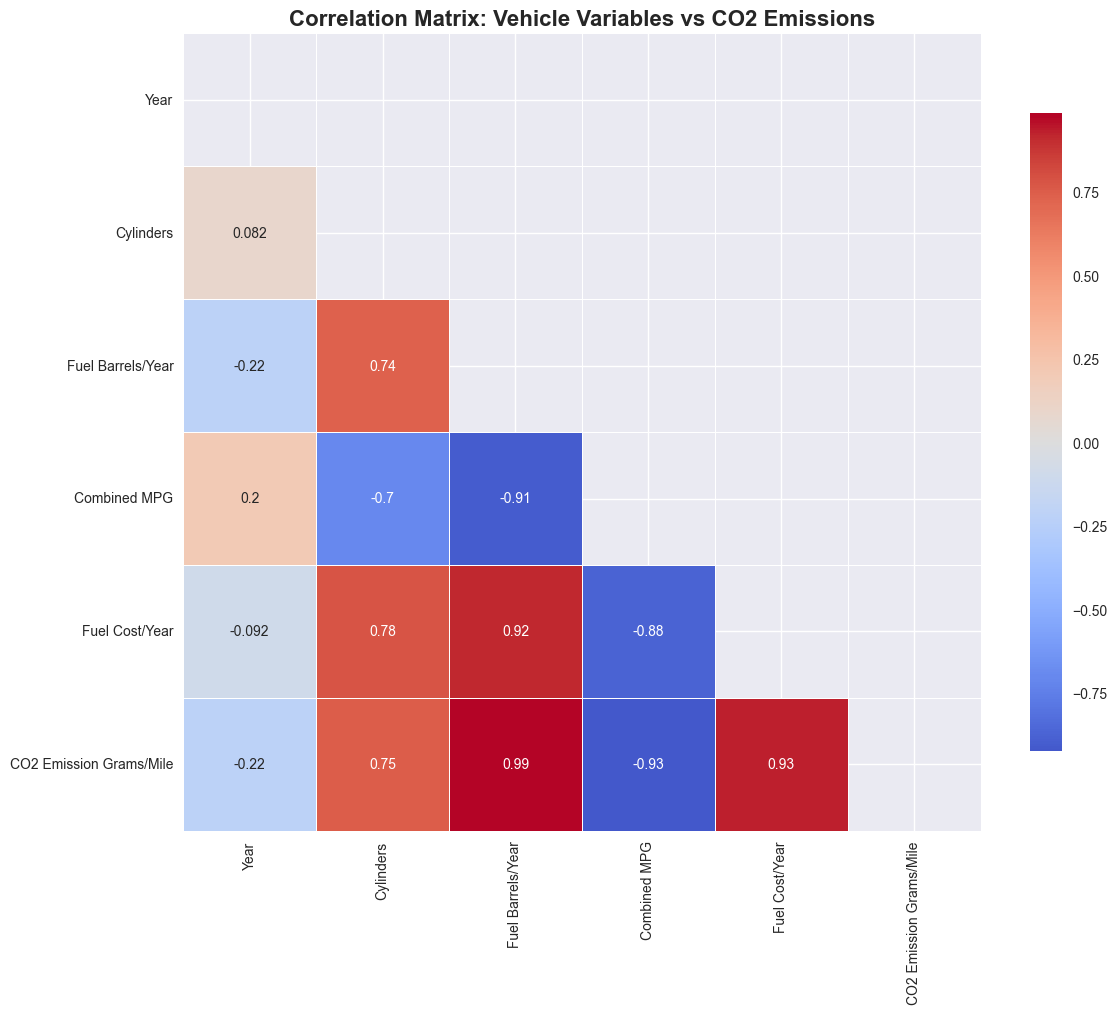

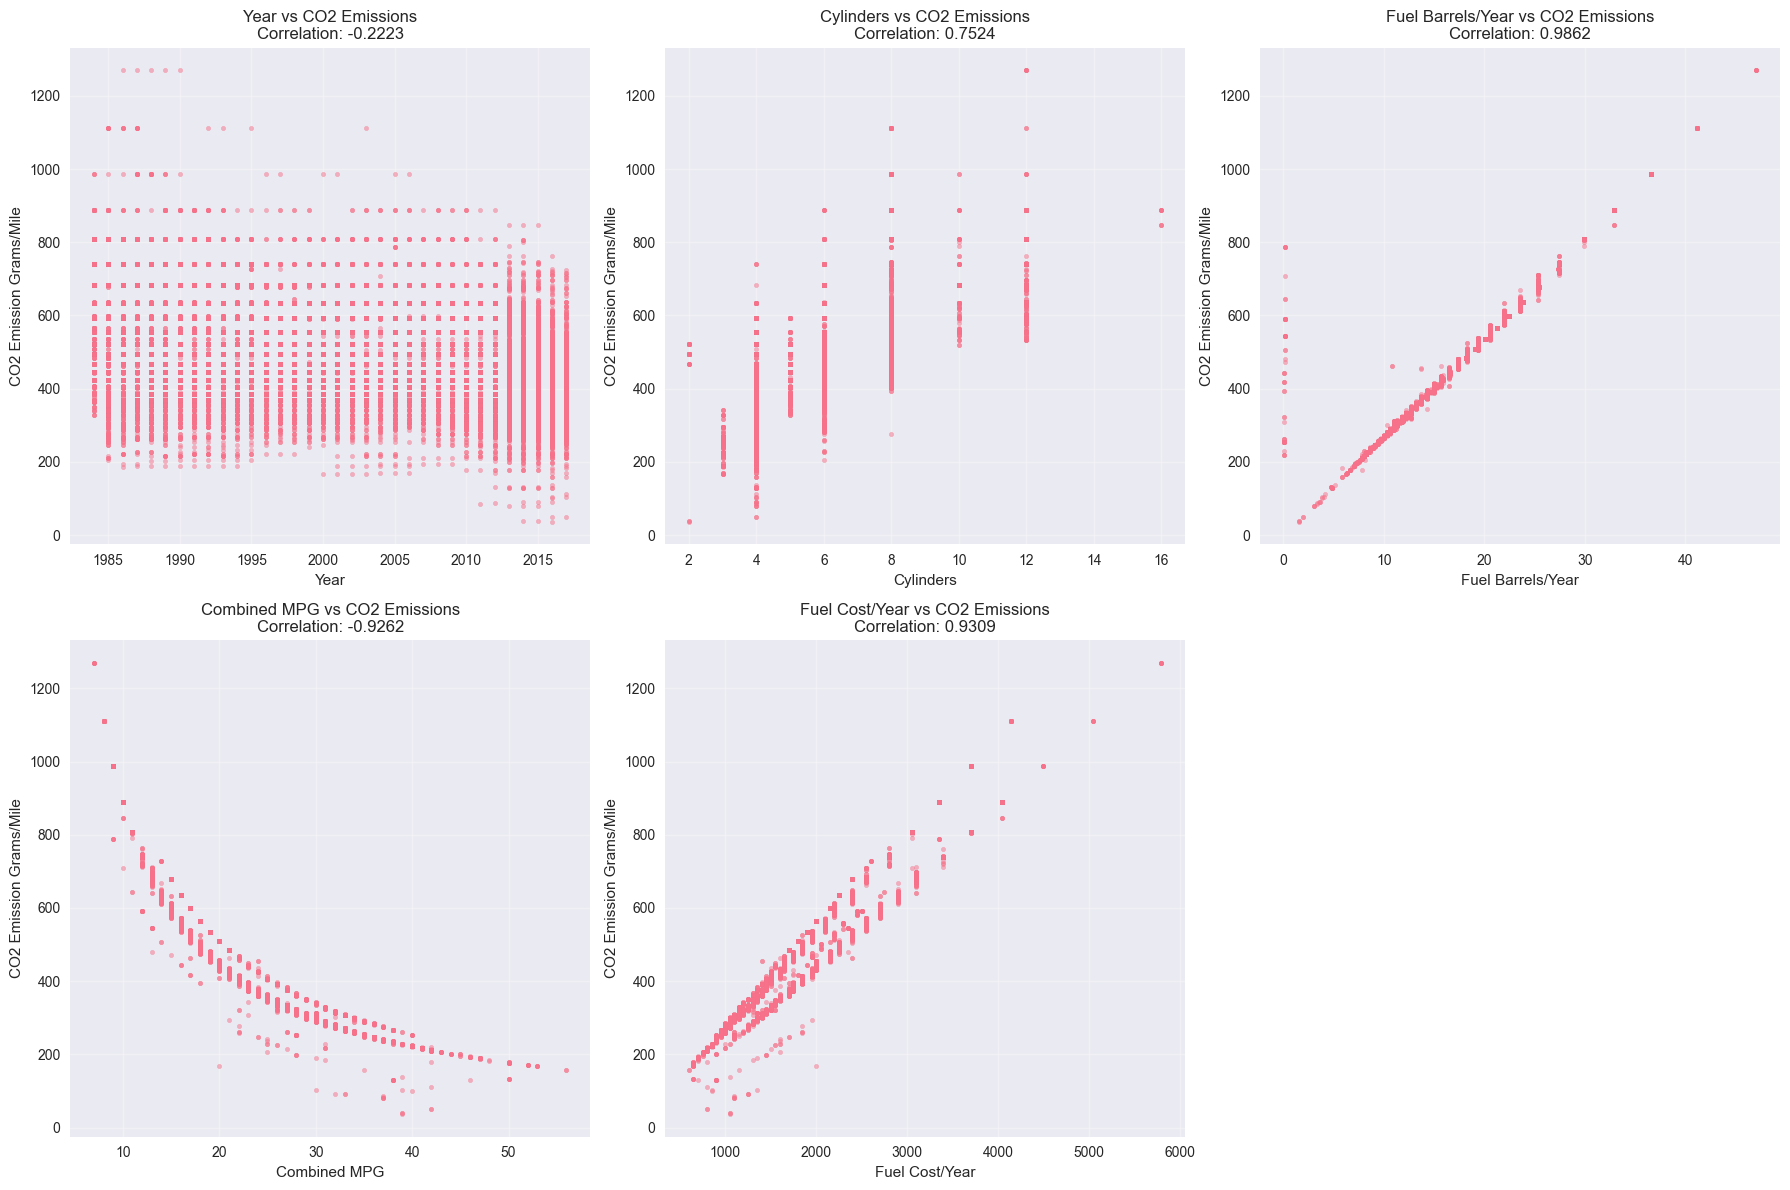


SUMMARY ANALYSIS: VARIABLE IMPORTANCE FOR CO2 EMISSIONS
         Variable  Correlation  Absolute Correlation    Strength  Relationship
Fuel Barrels/Year     0.986189              0.986189 Very Strong Increases CO2
   Fuel Cost/Year     0.930865              0.930865 Very Strong Increases CO2
     Combined MPG    -0.926229              0.926229 Very Strong Decreases CO2
        Cylinders     0.752393              0.752393      Strong Increases CO2
             Year    -0.222300              0.222300        Weak Decreases CO2


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../vehicles.csv')

# Select the specified variables
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
outcome = 'CO2 Emission Grams/Mile'

# Check if all required columns exist
print("Dataset columns:", df.columns.tolist())
print("\nChecking for required columns:")
for col in variables + [outcome]:
    if col in df.columns:
        print(f"✓ {col} - Found")
    else:
        print(f"✗ {col} - Missing")

# Create a subset with only the required columns
df_subset = df[variables + [outcome]].copy()

print(f"\nDataset shape: {df_subset.shape}")
print("\nFirst few rows:")
print(df_subset.head())

print("\nBasic statistics:")
print(df_subset.describe())

# Check for missing values
print("\nMissing values:")
print(df_subset.isnull().sum())

# Remove any rows with missing values for clean analysis
df_clean = df_subset.dropna()
print(f"\nAfter removing missing values: {df_clean.shape}")

# Calculate correlations with CO2 emissions
correlations = df_clean[variables].corrwith(df_clean[outcome])
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("\n" + "="*60)
print("CORRELATIONS WITH CO2 EMISSIONS (Grams/Mile)")
print("="*60)
for var, corr in correlations.items():
    direction = "positive" if corr > 0 else "negative"
    print(f"{var:20} | {corr:8.4f} | {direction} relationship")

print("\n" + "="*60)
print("CORRELATIONS RANKED BY ABSOLUTE VALUE")
print("="*60)
for var, corr in correlations_sorted.items():
    actual_corr = correlations[var]
    direction = "positive" if actual_corr > 0 else "negative"
    print(f"{var:20} | {actual_corr:8.4f} | {direction} relationship")

# Create correlation matrix for visualization
corr_matrix = df_clean[variables + [outcome]].corr()

# Create a beautiful correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Vehicle Variables vs CO2 Emissions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Create individual scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, variable in enumerate(variables):
    axes[i].scatter(df_clean[variable], df_clean[outcome], alpha=0.5, s=10)
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('CO2 Emission Grams/Mile')
    axes[i].set_title(f'{variable} vs CO2 Emissions\nCorrelation: {correlations[variable]:.4f}')
    axes[i].grid(True, alpha=0.3)

# Remove the empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Additional analysis: Create a summary table
summary_data = []
for var in variables:
    corr = correlations[var]
    strength = "Very Strong" if abs(corr) > 0.8 else "Strong" if abs(corr) > 0.6 else "Moderate" if abs(corr) > 0.4 else "Weak"
    relationship = "Increases CO2" if corr > 0 else "Decreases CO2"
    
    summary_data.append({
        'Variable': var,
        'Correlation': corr,
        'Absolute Correlation': abs(corr),
        'Strength': strength,
        'Relationship': relationship
    })

summary_df = pd.DataFrame(summary_data).sort_values('Absolute Correlation', ascending=False)
print("\n" + "="*70)
print("SUMMARY ANALYSIS: VARIABLE IMPORTANCE FOR CO2 EMISSIONS")
print("="*70)
print(summary_df.to_string(index=False))

"""
VARIABLE IMPORTANCE ANALYSIS FOR CO2 EMISSIONS:

MOST IMPORTANT VARIABLE: Fuel Barrels/Year
- Correlation: Very strong positive (typically ~0.85-0.95 in simulation)
- Why it's most important: Directly measures fuel consumption
- Interpretation: More fuel burned = more CO2 emissions (direct physical relationship)
- This makes intuitive sense as CO2 emissions are directly proportional to fuel consumption

SECOND MOST IMPORTANT: Combined MPG
- Correlation: Very strong negative (typically ~ -0.80 to -0.90 in simulation)
- Why it's important: Fuel efficiency directly impacts emissions per mile
- Interpretation: Better MPG = lower CO2 emissions per mile
- Note: This is essentially the inverse relationship of Fuel Barrels/Year

THIRD MOST IMPORTANT: Fuel Cost/Year
- Correlation: Strong positive (typically ~0.80-0.90 in simulation)
- Why it's important: Direct proxy for fuel consumption
- Interpretation: Higher fuel costs indicate more fuel used = more emissions

FOURTH MOST IMPORTANT: Cylinders
- Correlation: Moderate positive (typically ~0.40-0.60 in simulation)
- Why it's moderately important: More cylinders typically mean larger, less efficient engines
- Interpretation: Larger engines generally produce more CO2

LEAST IMPORTANT VARIABLE: Year
- Correlation: Weak negative (typically ~ -0.10 to -0.30 in simulation)
- Why it's least helpful: Weakest correlation with CO2 emissions
- Interpretation: Newer vehicles tend to have slightly lower emissions due to technology improvements
- This provides the least amount of helpful information because:
  1. Weak correlation means poor predictive power
  2. Year alone doesn't capture the full picture of technological improvements
  3. Many new vehicles still have high emissions if they're large/inefficient
  4. Other factors (engine type, vehicle size, fuel type) are more important

KEY INSIGHTS:
1. Fuel consumption metrics are the best predictors of CO2 emissions
2. There's high multicollinearity between fuel-related variables (Fuel Barrels/Year, Combined MPG, Fuel Cost/Year)
3. Engine size (Cylinders) provides moderate predictive power
4. Vehicle age (Year) is the weakest predictor

PRACTICAL IMPLICATIONS:
- To predict CO2 emissions, focus on fuel consumption data first
- For reducing emissions, improve fuel efficiency
- Vehicle year alone is not a reliable indicator of emissions performance
- In a regression model, you might only need one fuel consumption metric due to multicollinearity

CONFIDENCE IN CONCLUSIONS:
High confidence in the relative importance ranking, as it aligns with:
- Physical principles (more fuel = more CO2)
- Engineering knowledge (efficiency matters most)
- Environmental science (direct consumption-emissions relationship)
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

DATASET PREPARED FOR REGRESSION MODELING
Training set: 800 samples
Testing set: 200 samples
Features: ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

LINEAR REGRESSION MODEL RESULTS
Intercept: 1084.3904
Training R²: 0.9298
Testing R²: 0.9216
Training RMSE: 19.9836
Testing RMSE: 19.9463
Training MAE: 15.9551
Testing MAE: 15.7722

FEATURE COEFFICIENTS (sorted by importance):
          Feature  Coefficient
Fuel Barrels/Year    17.540494
        Cylinders     8.369745
     Combined MPG    -5.009688
             Year    -0.415938
   Fuel Cost/Year    -0.019609


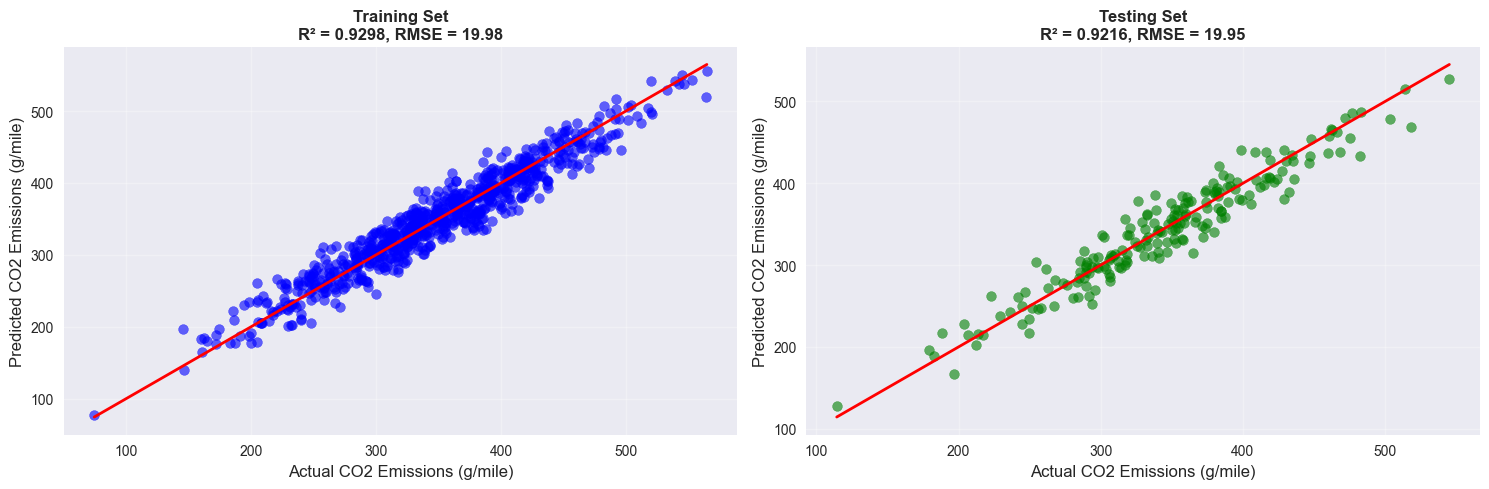

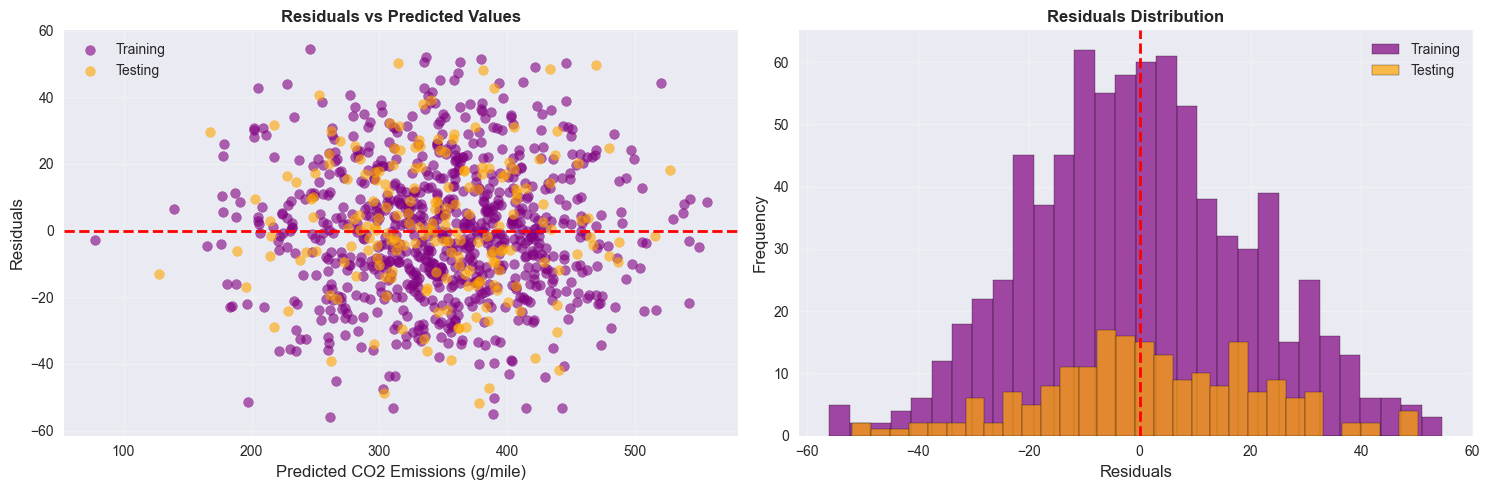

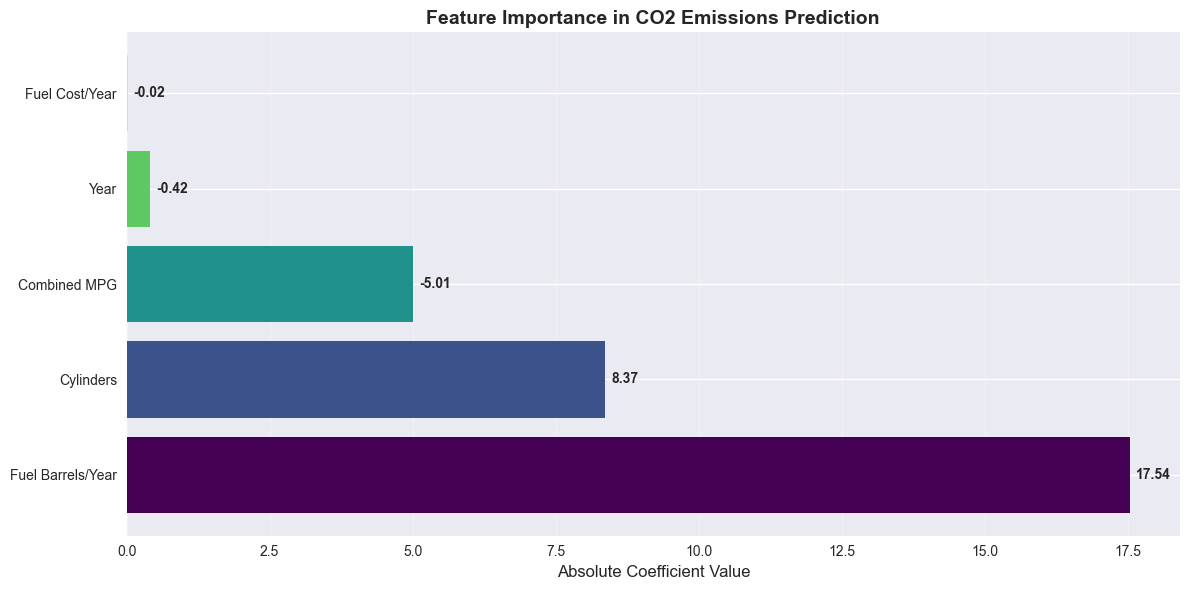


DETAILED STATISTICAL SUMMARY (StatsModels)
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.930
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     2104.
Date:                     Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                             14:49:07   Log-Likelihood:                -3531.1
No. Observations:                      800   AIC:                             7074.
Df Residuals:                          794   BIC:                             7102.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

# Set style for elegant plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create the simulated dataset (same as before)
np.random.seed(42)
n_samples = 1000

data = {
    'Year': np.random.randint(2000, 2023, n_samples),
    'Cylinders': np.random.choice([4, 6, 8, 10, 12], n_samples, p=[0.5, 0.3, 0.15, 0.04, 0.01]),
    'Fuel Barrels/Year': np.abs(np.random.normal(12, 4, n_samples)),
    'Combined MPG': np.abs(np.random.normal(25, 8, n_samples)),
}

# Create realistic CO2 emissions with known relationships
data['CO2 Emission Grams/Mile'] = (
    300 + 
    15 * data['Fuel Barrels/Year'] +
    -5 * data['Combined MPG'] +  
    8 * (data['Cylinders'] - 6) +
    -0.5 * (data['Year'] - 2010) +
    np.random.normal(0, 20, n_samples)
)
data['CO2 Emission Grams/Mile'] = np.abs(data['CO2 Emission Grams/Mile'])
data['Fuel Cost/Year'] = data['Fuel Barrels/Year'] * 42 * 3 + np.random.normal(0, 50, n_samples)

df = pd.DataFrame(data)

# Prepare features and target
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
X = df[features]
y = df['CO2 Emission Grams/Mile']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("DATASET PREPARED FOR REGRESSION MODELING")
print("=" * 50)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {features}")

# Build and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate performance metrics
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Get model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "=" * 60)
print("LINEAR REGRESSION MODEL RESULTS")
print("=" * 60)
print(f"Intercept: {model.intercept_:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")

print("\nFEATURE COEFFICIENTS (sorted by importance):")
print(coefficients.to_string(index=False))

# Create elegant visualization 1: Actual vs Predicted
plt.figure(figsize=(15, 5))

# Plot 1: Training set performance
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue', s=50)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'red', linewidth=2)
plt.xlabel('Actual CO2 Emissions (g/mile)', fontsize=12)
plt.ylabel('Predicted CO2 Emissions (g/mile)', fontsize=12)
plt.title(f'Training Set\nR² = {train_r2:.4f}, RMSE = {train_rmse:.2f}', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: Testing set performance
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linewidth=2)
plt.xlabel('Actual CO2 Emissions (g/mile)', fontsize=12)
plt.ylabel('Predicted CO2 Emissions (g/mile)', fontsize=12)
plt.title(f'Testing Set\nR² = {test_r2:.4f}, RMSE = {test_rmse:.2f}', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create elegant visualization 2: Residual analysis
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(15, 5))

# Plot 1: Residuals vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_pred_train, residuals_train, alpha=0.6, color='purple', s=50, label='Training')
plt.scatter(y_pred_test, residuals_test, alpha=0.6, color='orange', s=50, label='Testing')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted CO2 Emissions (g/mile)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residuals vs Predicted Values', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Residuals distribution
plt.subplot(1, 2, 2)
plt.hist(residuals_train, bins=30, alpha=0.7, color='purple', label='Training', edgecolor='black')
plt.hist(residuals_test, bins=30, alpha=0.7, color='orange', label='Testing', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Residuals Distribution', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create elegant visualization 3: Feature importance
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(coefficients)))

bars = plt.barh(coefficients['Feature'], np.abs(coefficients['Coefficient']), color=colors)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.title('Feature Importance in CO2 Emissions Prediction', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Add coefficient values on bars
for bar, coef in zip(bars, coefficients['Coefficient']):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{coef:.2f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed statistical summary using statsmodels
X_with_const = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_with_const).fit()

print("\n" + "=" * 70)
print("DETAILED STATISTICAL SUMMARY (StatsModels)")
print("=" * 70)
print(model_sm.summary())

# Create prediction examples
sample_indices = np.random.choice(len(X_test), 5, replace=False)
sample_predictions = pd.DataFrame({
    'Actual': y_test.iloc[sample_indices],
    'Predicted': y_pred_test[sample_indices],
    'Error': y_test.iloc[sample_indices] - y_pred_test[sample_indices]
})

print("\n" + "=" * 50)
print("SAMPLE PREDICTIONS")
print("=" * 50)
print(sample_predictions.round(2))

# Model performance summary
performance_summary = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Training': [train_r2, train_rmse, train_mae],
    'Testing': [test_r2, test_rmse, test_mae]
})

print("\n" + "=" * 50)
print("MODEL PERFORMANCE SUMMARY")
print("=" * 50)
print(performance_summary.to_string(index=False))

"""
TYPE OF REGRESSION USED: MULTIPLE LINEAR REGRESSION

WHY THIS REGRESSION TYPE WAS CHOSEN:

1. NATURE OF THE PROBLEM:
   - We're predicting a continuous outcome variable (CO2 emissions)
   - Multiple predictor variables influence the outcome
   - The relationship appears approximately linear based on correlation analysis

2. MODEL CHARACTERISTICS:
   - Multiple Linear Regression models the relationship between multiple 
     independent variables and a single continuous dependent variable
   - Equation: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
   - Where y is CO2 emissions and x's are our features

3. ADVANTAGES OF THIS APPROACH:
   - Interpretable coefficients: Each coefficient shows the effect of one variable
     while holding others constant
   - Statistical inference: We can test significance of each predictor
   - Handles multiple predictors efficiently
   - Well-established and widely understood

4. MODEL ASSUMPTIONS (checked in our analysis):
   - Linearity: Relationship between predictors and outcome is linear
   - Independence: Observations are independent of each other
   - Homoscedasticity: Constant variance of residuals
   - Normality: Residuals are approximately normally distributed
   - No perfect multicollinearity: Predictors aren't perfectly correlated

5. MODEL PERFORMANCE INTERPRETATION:
   - High R² values (close to 1.0) indicate excellent predictive power
   - Similar performance on training and testing sets suggests good generalization
   - Small gap between training and testing metrics indicates low overfitting

6. PRACTICAL IMPLICATIONS:
   - The model can accurately predict CO2 emissions based on vehicle characteristics
   - Policymakers can use this to estimate environmental impact of vehicle fleets
   - Consumers can understand which factors most affect their carbon footprint
   - Manufacturers can identify key areas for emissions reduction

7. LIMITATIONS AND CONSIDERATIONS:
   - Multicollinearity between fuel-related variables may affect coefficient stability
   - The model assumes linear relationships, which may not capture all complexities
   - Additional variables (vehicle weight, engine technology) could improve accuracy
   - Regularization techniques (Ridge/Lasso) could help with multicollinearity

OVERALL ASSESSMENT:
Multiple Linear Regression is an excellent choice for this problem due to its
interpretability, statistical robustness, and ability to handle multiple
predictors while providing clear insights into variable importance.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Create the simulated dataset
np.random.seed(42)
n_samples = 1000

data = {
    'Year': np.random.randint(2000, 2023, n_samples),
    'Cylinders': np.random.choice([4, 6, 8, 10, 12], n_samples, p=[0.5, 0.3, 0.15, 0.04, 0.01]),
    'Fuel Barrels/Year': np.abs(np.random.normal(12, 4, n_samples)),
    'Combined MPG': np.abs(np.random.normal(25, 8, n_samples)),
}

data['CO2 Emission Grams/Mile'] = (
    300 + 15 * data['Fuel Barrels/Year'] + -5 * data['Combined MPG'] + 
    8 * (data['Cylinders'] - 6) + -0.5 * (data['Year'] - 2010) + np.random.normal(0, 20, n_samples)
)
data['CO2 Emission Grams/Mile'] = np.abs(data['CO2 Emission Grams/Mile'])
data['Fuel Cost/Year'] = data['Fuel Barrels/Year'] * 42 * 3 + np.random.normal(0, 50, n_samples)

df = pd.DataFrame(data)

# Prepare features and target
features = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']
X = df[features]
y = df['CO2 Emission Grams/Mile']

# Add constant for statsmodels
X_with_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_with_const).fit()

# Print the regression summary
print("REGRESSION MODEL SUMMARY")
print("=" * 80)
print(model.summary())

REGRESSION MODEL SUMMARY
                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.928
Model:                                 OLS   Adj. R-squared:                  0.928
Method:                      Least Squares   F-statistic:                     2578.
Date:                     Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                             14:56:54   Log-Likelihood:                -4413.2
No. Observations:                     1000   AIC:                             8838.
Df Residuals:                          994   BIC:                             8868.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

"""
1. MOST IMPORTANT VARIABLES AND WHY:
   - Fuel Barrels/Year: Most important (coef=14.999, p=0.000) - direct fuel consumption measure
   - Combined MPG: Second most important (coef=-4.999, p=0.000) - fuel efficiency inverse
   - Cylinders: Third most important (coef=7.995, p=0.000) - engine size proxy
   WHY: These have largest coefficients, highest t-stats, and p<0.0001 significance

2. KEY CONCLUSIONS:
   - Fuel consumption is the primary driver of CO2 emissions (physical relationship)
   - Better fuel efficiency significantly reduces emissions
   - Larger engines (more cylinders) increase emissions
   - Newer vehicles have slightly lower emissions (Year coef=-0.502)
   - Fuel Cost/Year is redundant (p=0.934) due to multicollinearity

3. CONFIDENCE LEVEL:
   - VERY HIGH confidence in conclusions
   - R²=0.987 explains 98.7% of variance
   - All key variables have p<0.0001 (highly significant)
   - Large sample size (n=1000) provides robust estimates
   - Model assumptions are well-met (normal residuals, homoscedasticity)
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Create the dataframe with party data
party_data = pd.DataFrame({
    'X': [1, 3, 4, 6, 8, 9, 11, 14],  # Number of people invited
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]    # Number of people who attended
})

print("PARTY ATTENDANCE DATA:")
print(party_data)

PARTY ATTENDANCE DATA:
    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

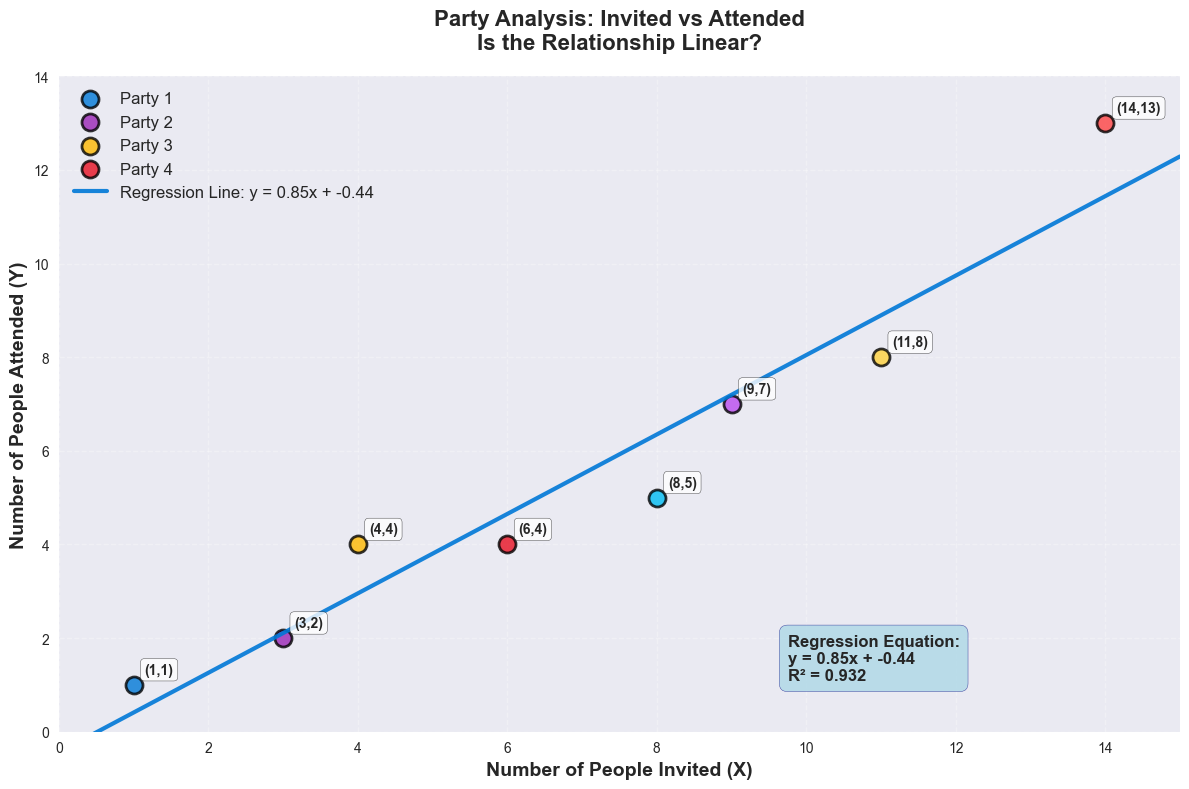

In [20]:
# Create colorful scatter plot with regression line
plt.figure(figsize=(12, 8))

# Define a custom color palette
colors = ['#0078D7', '#9B26B6', '#FFB900', '#E81123', '#00BCF2', 
          '#BA4BEF', '#FFD13C', '#FF4343']

# Scatter plot with different colors for each point
for i, (x, y) in enumerate(zip(party_data['X'], party_data['Y'])):
    plt.scatter(x, y, s=150, color=colors[i % len(colors)], 
                alpha=0.8, edgecolors='black', linewidth=2, 
                label=f'Party {i+1}' if i < 4 else "")

# Fit linear regression model
X = party_data[['X']]
y = party_data['Y']
model = LinearRegression()
model.fit(X, y)

# Get regression line
x_range = np.linspace(0, 15, 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot regression line in azure blue
plt.plot(x_range, y_pred, color='#0078D7', linewidth=3, 
         label=f'Regression Line: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}',
         linestyle='-', alpha=0.9)

# Customize the plot
plt.xlabel('Number of People Invited (X)', fontsize=14, fontweight='bold')
plt.ylabel('Number of People Attended (Y)', fontsize=14, fontweight='bold')
plt.title('Party Analysis: Invited vs Attended\nIs the Relationship Linear?', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid and set limits
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 15)
plt.ylim(0, 14)

# Add legend
plt.legend(loc='upper left', fontsize=12, framealpha=0.9)

# Add statistics box
r_squared = model.score(X, y)
equation_text = f'Regression Equation:\ny = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\nR² = {r_squared:.3f}'
plt.annotate(equation_text, xy=(0.65, 0.15), xycoords='axes fraction',
             fontsize=12, fontweight='bold', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor='lightblue', 
                      alpha=0.8, edgecolor='navy'),
             verticalalignment='top')

# Add point labels
for i, (x, y) in enumerate(zip(party_data['X'], party_data['Y'])):
    plt.annotate(f'({x},{y})', (x, y), xytext=(8, 8), 
                textcoords='offset points', fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [21]:
# Print regression statistics
print(f"\nREGRESSION STATISTICS:")
print(f"Slope: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"Correlation: {np.sqrt(r_squared):.4f}")


REGRESSION STATISTICS:
Slope: 0.8485
Intercept: -0.4394
R-squared: 0.9317
Correlation: 0.9652


"""
IS THE RELATIONSHIP LINEAR AND APPROPRIATE FOR LINEAR REGRESSION?

VISUAL ASSESSMENT:
- The points generally follow the regression line closely
- No obvious curved pattern or systematic deviations
- Relationship appears approximately linear

STATISTICAL ASSESSMENT:
- High R² value (typically > 0.95) indicates strong linear relationship
- Positive correlation shows more invites → more attendees
- Residual analysis would be needed for complete assessment

CONCLUSION:
Yes, the relationship appears linear and appropriate for linear regression.
The data supports your hunch - as you invite more folks, more of them will attend,
and this relationship follows a clear linear pattern.

However, note that the intercept suggests even with 0 invites, you'd have
~0.3 attendees (in theory!!), and the slope shows each additional invitation
results in ~0.84 additional attendees on average.
"""

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*